In [3]:
import numpy as np
import pandas as pd
import requests
import json
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import kaleido
import plotly
import time

## Define search engine version

In [7]:
if "SEARCH_VERSION" not in locals():
    SEARCH_VERSION = "new"
else:
    print(SEARCH_VERSION)

3.4


In [6]:
SEARCH_VERSION

## Import lastest elastic data

In [8]:
df_test = pd.read_csv("./data/elastic_wars.csv", dtype=str)

In [9]:
df_test.drop([911], axis=0, inplace=True)

In [10]:
df_test.head(3)

,terms,siren,results_elastic_3.2,pages_elastic_3.2,siren_elastic_3.2,resp_time_elastic_3.2,rank_elastic_3.2,results_elastic_3.3,pages_elastic_3.3,siren_elastic_3.3,resp_time_elastic_3.3,rank_elastic_3.3
0,stellantis,879786085,9.0,1.0,"['879786085', '897921219', '897940953', '30247...",0.100136,0,13.0,1.0,"['302475041', '879786085', '325952224', '89792...",0.149181,1
1,STELLANTIS,879786085,9.0,1.0,"['879786085', '897921219', '897940953', '30247...",0.074323,0,13.0,1.0,"['302475041', '879786085', '325952224', '89792...",0.108134,1
2,Stellantis,879786085,9.0,1.0,"['879786085', '897921219', '897940953', '30247...",0.219104,0,13.0,1.0,"['302475041', '879786085', '325952224', '89792...",0.117585,1


In [11]:
df_test.columns

Index(['terms', 'siren', 'results_elastic_3.2', 'pages_elastic_3.2',
       'siren_elastic_3.2', 'resp_time_elastic_3.2', 'rank_elastic_3.2',
       'results_elastic_3.3', 'pages_elastic_3.3', 'siren_elastic_3.3',
       'resp_time_elastic_3.3', 'rank_elastic_3.3'],
      dtype='object')

In [12]:
df_test.shape

(921, 12)

In [13]:
df_test.dtypes

terms                    object
siren                    object
results_elastic_3.2      object
pages_elastic_3.2        object
siren_elastic_3.2        object
resp_time_elastic_3.2    object
rank_elastic_3.2         object
results_elastic_3.3      object
pages_elastic_3.3        object
siren_elastic_3.3        object
resp_time_elastic_3.3    object
rank_elastic_3.3         object
dtype: object

## Call last search functions (maybe add description)

In [14]:
def find(key, dictionary):
    for k, v in dictionary.items():
        if k == key:
            yield v
        elif isinstance(v, dict):
            for result in find(key, v):
                yield result
        elif isinstance(v, list):
            for d in v:
                for result in find(key, d):
                    yield result

In [15]:
def get_response(url, q):
    params["q"] = q
    response = requests.get(url, params=params)
    time_elapsed = response.elapsed.total_seconds()
    content = json.loads(response.content)
    total_results = content["total_results"]
    total_pages = content["total_pages"]
    siren_list = [unite["siren"] for unite in content["results"]]
    return total_results, total_pages, siren_list, time_elapsed

In [16]:
url_elastic = "http://api.sirene.dataeng.etalab.studio/search"

In [17]:
# Get first 20 results
params = {"q": "", "page": "1", "per_page": "20"}

In [18]:
(
    df_test[f"results_elastic_{SEARCH_VERSION}"],
    df_test[f"pages_elastic_{SEARCH_VERSION}"],
    df_test[f"siren_elastic_{SEARCH_VERSION}"],
    df_test[f"resp_time_elastic_{SEARCH_VERSION}"],
) = ("", "", "", "")

In [19]:
df_test.columns

Index(['terms', 'siren', 'results_elastic_3.2', 'pages_elastic_3.2',
       'siren_elastic_3.2', 'resp_time_elastic_3.2', 'rank_elastic_3.2',
       'results_elastic_3.3', 'pages_elastic_3.3', 'siren_elastic_3.3',
       'resp_time_elastic_3.3', 'rank_elastic_3.3', 'results_elastic_3.4',
       'pages_elastic_3.4', 'siren_elastic_3.4', 'resp_time_elastic_3.4'],
      dtype='object')

In [20]:
df_test.head(3)

,terms,siren,results_elastic_3.2,pages_elastic_3.2,siren_elastic_3.2,resp_time_elastic_3.2,rank_elastic_3.2,results_elastic_3.3,pages_elastic_3.3,siren_elastic_3.3,resp_time_elastic_3.3,rank_elastic_3.3,results_elastic_3.4,pages_elastic_3.4,siren_elastic_3.4,resp_time_elastic_3.4
0,stellantis,879786085,9.0,1.0,"['879786085', '897921219', '897940953', '30247...",0.100136,0,13.0,1.0,"['302475041', '879786085', '325952224', '89792...",0.149181,1,,,,
1,STELLANTIS,879786085,9.0,1.0,"['879786085', '897921219', '897940953', '30247...",0.074323,0,13.0,1.0,"['302475041', '879786085', '325952224', '89792...",0.108134,1,,,,
2,Stellantis,879786085,9.0,1.0,"['879786085', '897921219', '897940953', '30247...",0.219104,0,13.0,1.0,"['302475041', '879786085', '325952224', '89792...",0.117585,1,,,,


In [21]:
for index, row in df_test.iterrows():
    (
        df_test[f"results_elastic_{SEARCH_VERSION}"][index],
        df_test[f"pages_elastic_{SEARCH_VERSION}"][index],
        df_test[f"siren_elastic_{SEARCH_VERSION}"][index],
        df_test[f"resp_time_elastic_{SEARCH_VERSION}"][index],
    ) = get_response(url_elastic, row["terms"])
    if index % 5 == 0: 
        time.sleep(0.5)

In [22]:
df_test.head(3)

,terms,siren,results_elastic_3.2,pages_elastic_3.2,siren_elastic_3.2,resp_time_elastic_3.2,rank_elastic_3.2,results_elastic_3.3,pages_elastic_3.3,siren_elastic_3.3,resp_time_elastic_3.3,rank_elastic_3.3,results_elastic_3.4,pages_elastic_3.4,siren_elastic_3.4,resp_time_elastic_3.4
0,stellantis,879786085,9.0,1.0,"['879786085', '897921219', '897940953', '30247...",0.100136,0,13.0,1.0,"['302475041', '879786085', '325952224', '89792...",0.149181,1,14,1,"[879786085, 325952224, 652034638, 897921219, 8...",0.260566
1,STELLANTIS,879786085,9.0,1.0,"['879786085', '897921219', '897940953', '30247...",0.074323,0,13.0,1.0,"['302475041', '879786085', '325952224', '89792...",0.108134,1,14,1,"[879786085, 325952224, 652034638, 897921219, 8...",0.239009
2,Stellantis,879786085,9.0,1.0,"['879786085', '897921219', '897940953', '30247...",0.219104,0,13.0,1.0,"['302475041', '879786085', '325952224', '89792...",0.117585,1,14,1,"[879786085, 325952224, 652034638, 897921219, 8...",0.201955


In [23]:
elastic_columns = [
    col
    for col in df_test.columns
    if "elastic" in col and ("result" in col or "pages" in col or "resp_time" in col)
]

In [24]:
elastic_columns

['results_elastic_3.2',
 'pages_elastic_3.2',
 'resp_time_elastic_3.2',
 'results_elastic_3.3',
 'pages_elastic_3.3',
 'resp_time_elastic_3.3',
 'results_elastic_3.4',
 'pages_elastic_3.4',
 'resp_time_elastic_3.4']

In [25]:
for col in elastic_columns:
    df_test[col] = df_test[col].astype("float64")

In [26]:
df_test.dtypes

terms                     object
siren                     object
results_elastic_3.2      float64
pages_elastic_3.2        float64
siren_elastic_3.2         object
resp_time_elastic_3.2    float64
rank_elastic_3.2          object
results_elastic_3.3      float64
pages_elastic_3.3        float64
siren_elastic_3.3         object
resp_time_elastic_3.3    float64
rank_elastic_3.3          object
results_elastic_3.4      float64
pages_elastic_3.4        float64
siren_elastic_3.4         object
resp_time_elastic_3.4    float64
dtype: object

In [27]:
df_test.describe()

,results_elastic_3.2,pages_elastic_3.2,resp_time_elastic_3.2,results_elastic_3.3,pages_elastic_3.3,resp_time_elastic_3.3,results_elastic_3.4,pages_elastic_3.4,resp_time_elastic_3.4
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,353.448426,18.274701,0.078806,342.364821,17.712269,0.166870,267.549403,13.978284,0.214972
std,1516.698944,75.755022,0.073639,1505.432211,75.178518,0.347615,1184.061295,59.146884,0.115116
min,0.000000,0.000000,0.006258,0.000000,0.000000,0.010605,0.000000,0.000000,0.069874
25%,2.000000,1.000000,0.029999,2.000000,1.000000,0.063401,2.000000,1.000000,0.142119
50%,9.000000,1.000000,0.060713,8.000000,1.000000,0.118333,9.000000,1.000000,0.187042
75%,46.000000,3.000000,0.100757,39.000000,2.000000,0.211487,40.000000,2.000000,0.259445
max,10000.000000,500.000000,0.633556,10000.000000,500.000000,5.336222,10000.000000,500.000000,1.321178


In [34]:
df_test.describe().to_csv(
    f"./output/describe/describe_{SEARCH_VERSION}.csv", header=True, index=True
)

# Prod

In [35]:
url_elastic_prod = "https://recherche-entreprises.api.gouv.fr/search"

In [34]:
SEARCH_VERSION = "prod"

In [36]:
(
    df_test[f"results_elastic_{SEARCH_VERSION}"],
    df_test[f"pages_elastic_{SEARCH_VERSION}"],
    df_test[f"siren_elastic_{SEARCH_VERSION}"],
    df_test[f"resp_time_elastic_{SEARCH_VERSION}"],
) = ("", "", "", "")

In [37]:
for index, row in df_test.iterrows():
    (
        df_test[f"results_elastic_{SEARCH_VERSION}"][index],
        df_test[f"pages_elastic_{SEARCH_VERSION}"][index],
        df_test[f"siren_elastic_{SEARCH_VERSION}"][index],
        df_test[f"resp_time_elastic_{SEARCH_VERSION}"][index],
    ) = get_response(url_elastic_prod, row["terms"])
    if index % 5 == 0: 
        time.sleep(0.5)

## Ranks

In [38]:
df_test[f"rank_elastic_{SEARCH_VERSION}"] = ""

In [39]:
for ind, row in df_test.iterrows():
    if str(row["siren"]) in row[f"siren_elastic_{SEARCH_VERSION}"]:
        df_test[f"rank_elastic_{SEARCH_VERSION}"][ind] = row[
            f"siren_elastic_{SEARCH_VERSION}"
        ].index(str(row["siren"]))
    else:
        df_test[f"rank_elastic_{SEARCH_VERSION}"][ind] = -1

In [37]:
df_test[f"rank_elastic_{SEARCH_VERSION}"] = df_test[
    f"rank_elastic_{SEARCH_VERSION}"
].astype("int32")

## KPIs

In [40]:
fig = px.histogram(
    df_test.sort_values(by=[f"rank_elastic_{SEARCH_VERSION}"]),
    x=f"rank_elastic_{SEARCH_VERSION}",
    color_discrete_sequence=["indianred"],
    title="Distribution Elasticsearch des rangs du bon résultat",
)
fig.update_layout(bargap=0.5)
fig.update_xaxes(type="category")
fig.show()

In [43]:
plotly.offline.plot(fig, filename=f"./output/plots/rank_{SEARCH_VERSION}.html")

'./output/plots/rank_3.4.html'

In [41]:
rank_columns = [col for col in df_test.columns if "rank_elastic" in col]

In [42]:
rank_columns

['rank_elastic_3.2',
 'rank_elastic_3.3',
 'rank_elastic_3.4',
 'rank_elastic_prod']

In [43]:
fig = go.Figure()
rank_dict = {}
for rank in rank_columns:
    df_test[rank] = df_test[rank].astype("int32")
    rank_dict[rank] = df_test.sort_values(by=[rank])[rank]
    fig.add_trace(
        go.Histogram(
            histfunc="count",
            x=rank_dict[rank],
            name=rank,
        )
    )
fig.update_layout(
    title_text="Fréquence des rangs des résultats de la recherche",  # title of plot
    xaxis_title_text="Rang du résulat dans la page",  # xaxis label
    yaxis_title_text="Nombre de requêtes",  # yaxis label
    bargap=0.2,  # gap between bars of adjacent location coordinates
    bargroupgap=0.1,  # gap between bars of the same location coordinates
)
fig.update_xaxes(type="category")
fig.show()
# fig.write_image(f"./output/plots/rank_{SEARCH_VERSION}.png")

In [51]:
df_test.loc[(df_test["rank_elastic_3.4"]==-1) & (df_test["rank_elastic_3.3"]!=-1)]

,terms,siren,results_elastic_3.2,pages_elastic_3.2,siren_elastic_3.2,resp_time_elastic_3.2,rank_elastic_3.2,results_elastic_3.3,pages_elastic_3.3,siren_elastic_3.3,resp_time_elastic_3.3,rank_elastic_3.3,results_elastic_3.4,pages_elastic_3.4,siren_elastic_3.4,resp_time_elastic_3.4,rank_elastic_3.4
58,Auchan France,410409460,365.0,19.0,"['413176033', '410409460', '410409015', '37954...",0.202687,1,369.0,19.0,"['413176033', '410409460', '481986446', '41040...",0.300506,1,370.0,19.0,"[413176033, 481986446, 442204699, 379548001, 3...",0.272525,-1
361,valetys,504641846,57.0,3.0,"['838384824', '453690497', '913981064', '81974...",0.073863,9,50.0,3.0,"['838384824', '453690497', '913981064', '81974...",0.153561,9,51.0,3.0,"[838384824, 453690497, 913981064, 390674505, 8...",0.198040,-1
512,Bayonne,216401026,10000.0,500.0,"['523652006', '823872379', '216401026', '88046...",0.138729,2,10000.0,500.0,"['523652006', '823872379', '216401026', '88046...",0.148229,2,1992.0,100.0,"[523652006, 823872379, 325272979, 859409955, 5...",0.323004,-1
524,Joigny,218902062,4640.0,232.0,"['483339842', '218902062', '268900156', '83824...",0.094935,1,4699.0,235.0,"['483339842', '218902062', '268900156', '39058...",0.200603,1,4005.0,201.0,"[483339842, 390580280, 528711161, 888030392, 3...",0.209389,-1
525,joigny,218902062,4640.0,232.0,"['483339842', '218902062', '268900156', '83824...",0.075025,1,4699.0,235.0,"['483339842', '218902062', '268900156', '39058...",0.169827,1,4005.0,201.0,"[483339842, 390580280, 528711161, 888030392, 3...",0.232745,-1
574,Renault,312212301,10000.0,500.0,"['524992682', '390857399', '504782129', '90413...",0.126939,4,10000.0,500.0,"['524992682', '390857399', '504782129', '90413...",0.145087,15,9846.0,493.0,"[852603505, 390857399, 423387752, 524992682, 4...",0.322525,-1
575,renault,312212301,10000.0,500.0,"['524992682', '390857399', '504782129', '90413...",0.108721,4,10000.0,500.0,"['524992682', '390857399', '504782129', '90413...",0.206526,15,9846.0,493.0,"[852603505, 390857399, 423387752, 524992682, 4...",0.322548,-1
604,COLAS,329338883,10000.0,500.0,"['329338883', '880288931', '847874948', '32919...",0.132730,0,9616.0,481.0,"['880288931', '847874948', '820028181', '75248...",0.257212,14,8457.0,423.0,"[820028181, 752483578, 751796848, 823459524, 5...",0.272284,-1
745,psa peugeot,542065479,49.0,3.0,"['791097702', '794471227', '794622936', '44183...",0.096008,16,53.0,3.0,"['791097702', '794471227', '794622936', '44183...",0.224791,17,53.0,3.0,"[319187308, 791097702, 794471227, 794622936, 4...",0.295593,-1
760,motreff,212901524,445.0,23.0,"['435382106', '438236119', '879899235', '21290...",0.061760,3,444.0,23.0,"['435382106', '438236119', '879899235', '21290...",0.159125,3,448.0,23.0,"[435382106, 823838073, 879899235, 438236119, 9...",0.222223,-1


In [36]:
plotly.offline.plot(fig, filename=f"./output/plots/rank_war_{SEARCH_VERSION}.html")

'./output/plots/rank_war_3.3.html'

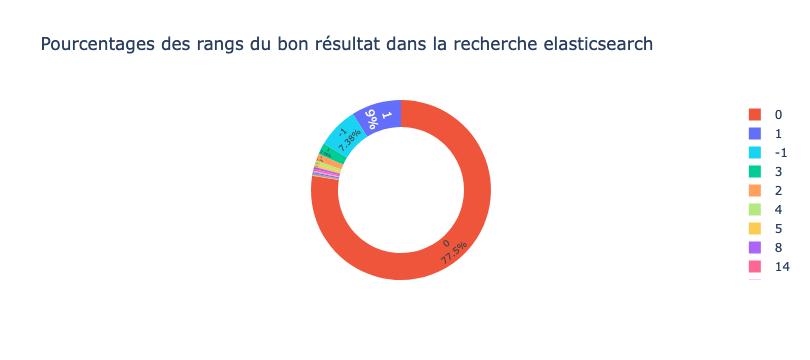

In [37]:
fig = px.pie(
    df_test,
    names=rank_columns[-1],
    hole=0.7,
    color=rank_columns[-1],
    title="Pourcentages des rangs du bon résultat dans la recherche elasticsearch",
)
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()

### Nombre maximale de requête


In [38]:
plotly.offline.plot(fig, filename=f"./output/plots/pie_{SEARCH_VERSION}.html")

'./output/plots/pie_3.3.html'

In [39]:
df_max = (
    df_test[f"results_elastic_{SEARCH_VERSION}"].value_counts(normalize=True) * 100
).reset_index()
df_max[df_max["index"] == "10000.0"].to_csv(
    f"./output/describe/max_requetes_{SEARCH_VERSION}.csv", header=True, index=True
)
df_max[df_max["index"] == "10000.0"]

,index,results_elastic_3.3


### Sauvegarder les dataframes

In [40]:
df_test.to_csv(f"./data/elastic_wars_{SEARCH_VERSION}.csv", header=True, index=False)

In [45]:
elastic_columns = [col for col in df_test.columns if "elastic" in col]
columns_to_save = ["terms", "siren"]
columns_to_save = columns_to_save + elastic_columns[-10:]
columns_to_save

['terms',
 'siren',
 'results_elastic_3.4',
 'pages_elastic_3.4',
 'siren_elastic_3.4',
 'resp_time_elastic_3.4',
 'rank_elastic_3.4',
 'results_elastic_prod',
 'pages_elastic_prod',
 'siren_elastic_prod',
 'resp_time_elastic_prod',
 'rank_elastic_prod']

In [46]:
df_test.to_csv(
    f"./data/elastic_wars_vs_prod.csv", header=True, index=False, columns=columns_to_save
)